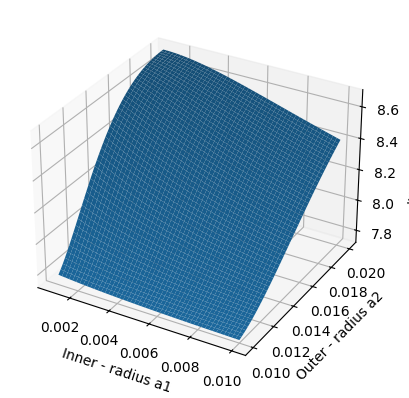

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 固定参数（假设值，可根据实际PZT - 3型陶瓷等情况修改）
omega = 2*np.pi*4e6  # 角频率
C0 = 1e-6  # 固有电容
h15 = -2.6 * 10 ** 9  # 压电应力常数
beta11s = 1.23 * 10 ** (-9)  # 恒应变下的介电隔离率
rho = 7500  # 材料密度
C55D = 2.94 * 10 ** 10  # 恒电位下的弹性刚度常数
l = 0.01  # 固定的厚度

# 计算相关固定参数
Ct = (C55D / rho) ** 0.5  # 剪切波传播速度
kt = omega / Ct  # 剪切波波数


# 定义计算tau的函数
def calculate_tau(a1, a2):
    return (9 * (a1 + a2) ** 2 * (a1 ** 2 + a2 ** 2)) / (8 * (a1 ** 2 + a1 * a2 + a2 ** 2) ** 2)


# 定义计算k15t的函数
def calculate_k15t(tau):
    return h15 / np.sqrt(beta11s * C55D * tau)


# 定义计算阻抗的函数
def calculate_impedance(k15t, kt, l, omega, C0):
    return 1 / (1j * omega * C0) * (1 - (k15t ** 2) * (np.tan(kt * l / 2) / (kt * l / 2)))


# 生成内、外径数组
a1_values = np.linspace(0.001, 0.01, 50)
a2_values = np.linspace(0.01, 0.02, 50)

# 初始化阻抗数组
impedance = np.zeros((len(a1_values), len(a2_values)), dtype = complex)

# 计算阻抗与内、外径的关系
for i, a1 in enumerate(a1_values):
    for j, a2 in enumerate(a2_values):
        tau = calculate_tau(a1, a2)
        k15t = calculate_k15t(tau)
        impedance[i, j]=calculate_impedance(k15t, kt, l, omega, C0)

# 绘制阻抗与内、外径的关系图（这里绘制阻抗模值的三维图）
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
A1, A2 = np.meshgrid(a1_values, a2_values)
ax.plot_surface(A1, A2, np.abs(impedance))
ax.set_xlabel('Inner - radius a1')
ax.set_ylabel('Outer - radius a2')
ax.set_zlabel('|Impedance|')
plt.show()

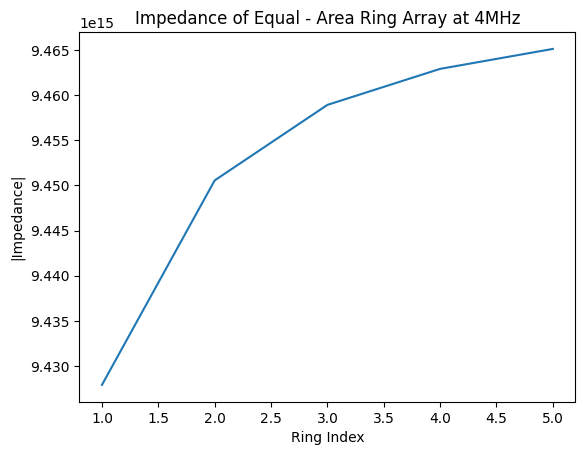

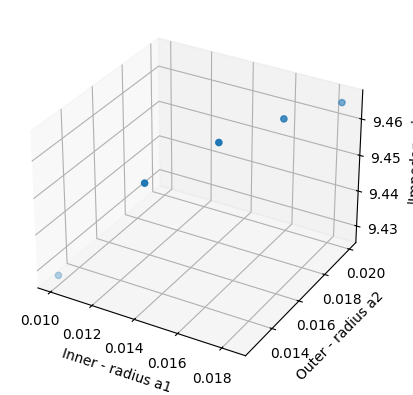

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PZT - 3型陶瓷参数
h15 = -2.6 * 10 ** 9  # 压电应力常数
beta11s = 1.23 * 10 ** (-9)  # 恒应变下的介电隔离率
rho = 7500  # 材料密度
C55D = 2.94 * 10 ** 10  # 恒电位下的弹性刚度常数
f = 4 * 10 ** 6  # 频率为4MHz
omega = 2 * np.pi * f  # 角频率
C0 = 1e-6  # 固有电容，假设值，可根据实际调整

# 计算剪切波传播速度
Ct = (C55D / rho) ** 0.5
# 根据经验公式或相关理论，假设厚度与波长相关，这里简单假设厚度为1/4波长（实际需根据具体理论模型调整）
lambda_t = Ct / f
l = lambda_t / 4  # 根据频率调整厚度

# 计算剪切波波数
kt = omega / Ct

# 定义计算tau的函数
def calculate_tau(a1, a2):
    return (9 * (a1 + a2) ** 2 * (a1 ** 2 + a2 ** 2)) / (8 * (a1 ** 2 + a1 * a2 + a2 ** 2) ** 2)


# 定义计算k15t的函数
def calculate_k15t(tau):
    return h15 / np.sqrt(beta11s * C55D * tau)


# 定义计算阻抗的函数
def calculate_impedance(k15t, kt, l, omega, C0):
    return 1 / (1j * omega * C0) * (1 - (k15t ** 2) * (np.tan(kt * l / 2) / (kt * l / 2)))


# 假设圆环阵列有n个圆环，总面积为total_area
n = 5  # 圆环数量
total_area = np.pi * (0.02 ** 2 - 0.01 ** 2)  # 假设总面积，可修改
single_area = total_area / n

# 初始化内、外径数组和阻抗数组
a1_values = np.zeros(n)
a2_values = np.zeros(n)
impedance = np.zeros(n, dtype=complex)

# 确定等面积圆环的内、外径
a1 = 0.01  # 第一个圆环的内径假设值
for i in range(n):
    a2 = np.sqrt(single_area / np.pi + a1 ** 2)
    a1_values[i] = a1
    a2_values[i] = a2
    a1 = a2

# 计算每个圆环的阻抗
for i in range(n):
    tau = calculate_tau(a1_values[i], a2_values[i])
    k15t = calculate_k15t(tau)
    impedance[i] = calculate_impedance(k15t, kt, l, omega, C0)

# 绘制圆环序号与阻抗模值的关系图
plt.plot(np.arange(1, n + 1), np.abs(impedance))
plt.xlabel('Ring Index')
plt.ylabel('|Impedance|')
plt.title('Impedance of Equal - Area Ring Array at 4MHz')
plt.show()

# 绘制3D图展示圆环内径、外径与阻抗模值的关系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_values, a2_values, np.abs(impedance))
ax.set_xlabel('Inner - radius a1')
ax.set_ylabel('Outer - radius a2')
ax.set_zlabel('|Impedance|')
plt.show()

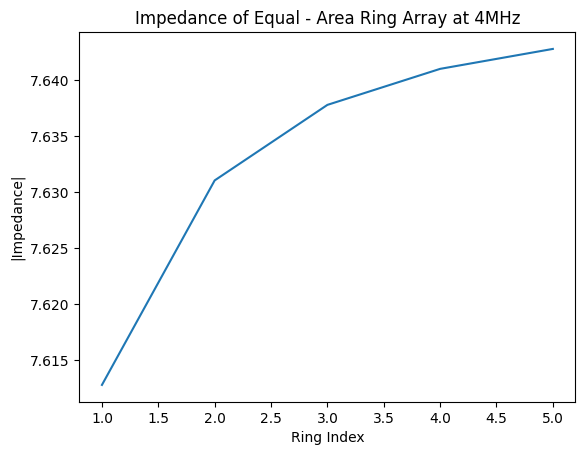

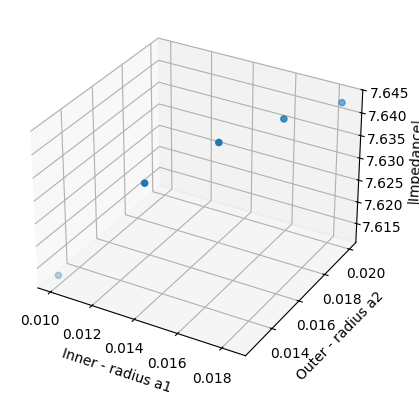

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PZT - 3型陶瓷参数
h15 = -2.6 * 10 ** 9  # 压电应力常数
beta11s = 1.23 * 10 ** (-9)  # 恒应变下的介电隔离率
rho = 7500  # 材料密度
C55D = 2.94 * 10 ** 10  # 恒电位下的弹性刚度常数
f = 4 * 10 ** 6  # 频率为4MHz
omega = 2 * np.pi * f  # 角频率

# 计算剪切波传播速度
Ct = (C55D / rho) ** 0.5
# 根据经验公式或相关理论，假设厚度与波长相关，这里简单假设厚度为1/4波长（实际需根据具体理论模型调整）
lambda_t = Ct / f
l = lambda_t / 4  # 根据频率调整厚度

# 假设圆环阵列有n个圆环，总面积为total_area
n = 5  # 圆环数量
total_area = np.pi * (0.02 ** 2 - 0.01 ** 2)  # 假设总面积，可修改
single_area = total_area / n

# 初始化内、外径数组和阻抗数组
a1_values = np.zeros(n)
a2_values = np.zeros(n)
impedance = np.zeros(n, dtype=complex)

# 确定等面积圆环的内、外径
a1 = 0.01  # 第一个圆环的内径假设值
for i in range(n):
    a2 = np.sqrt(single_area / np.pi + a1 ** 2)
    a1_values[i] = a1
    a2_values[i] = a2
    a1 = a2

# 计算每个圆环的阻抗
for i in range(n):
    # 计算每个圆环的面积作为振动横截面积S
    S = np.pi * (a2_values[i] ** 2 - a1_values[i] ** 2)
    # 根据公式计算C0
    C0 = S / (beta11s * l)
    tau = calculate_tau(a1_values[i], a2_values[i])
    k15t = calculate_k15t(tau)
    impedance[i] = calculate_impedance(k15t, kt, l, omega, C0)

# 定义计算tau的函数
def calculate_tau(a1, a2):
    return (9 * (a1 + a2) ** 2 * (a1 ** 2 + a2 ** 2)) / (8 * (a1 ** 2 + a1 * a2 + a2 ** 2) ** 2)


# 定义计算k15t的函数
def calculate_k15t(tau):
    return h15 / np.sqrt(beta11s * C55D * tau)


# 定义计算阻抗的函数
def calculate_impedance(k15t, kt, l, omega, C0):
    return 1 / (1j * omega * C0) * (1 - (k15t ** 2) * (np.tan(kt * l / 2) / (kt * l / 2)))

# 绘制圆环序号与阻抗模值的关系图
plt.plot(np.arange(1, n + 1), np.abs(impedance))
plt.xlabel('Ring Index')
plt.ylabel('|Impedance|')
plt.title('Impedance of Equal - Area Ring Array at 4MHz')
plt.show()

# 绘制3D图展示圆环内径、外径与阻抗模值的关系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_values, a2_values, np.abs(impedance))
ax.set_xlabel('Inner - radius a1')
ax.set_ylabel('Outer - radius a2')
ax.set_zlabel('|Impedance|')
plt.show()

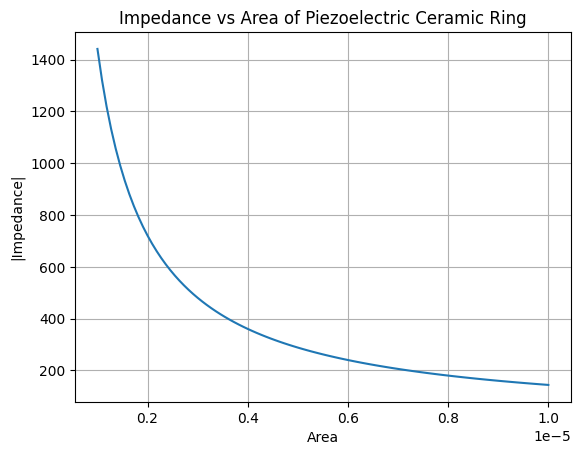

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# PZT - 3型陶瓷参数
h15 = -2.6 * 10 ** 9  # 压电应力常数
beta11s = 1.23 * 10 ** (-9)  # 恒应变下的介电隔离率
rho = 7500  # 材料密度
C55D = 2.94 * 10 ** 10  # 恒电位下的弹性刚度常数
f = 4 * 10 ** 6  # 频率为4MHz
omega = 2 * np.pi * f  # 角频率

# 计算剪切波传播速度
Ct = (C55D / rho) ** 0.5
# 根据经验公式或相关理论，假设厚度与波长相关，这里简单假设厚度为1/4波长（实际需根据具体理论模型调整）
lambda_t = Ct / f
l = lambda_t / 4  # 根据频率调整厚度

# 计算剪切波波数
kt = omega / Ct

# 定义计算tau的函数
def calculate_tau(a1, a2):
    return (9 * (a1 + a2) ** 2 * (a1 ** 2 + a2 ** 2)) / (8 * (a1 ** 2 + a1 * a2 + a2 ** 2) ** 2)

# 定义计算k15t的函数
def calculate_k15t(tau):
    return h15 / np.sqrt(beta11s * C55D * tau)

# 定义计算阻抗的函数
def calculate_impedance(k15t, kt, l, omega, C0):
    return 1 / (1j * omega * C0) * (1 - (k15t ** 2) * (np.tan(kt * l / 2) / (kt * l / 2)))

# 定义一系列不同的面积值
min_area = 1e-6  # 最小面积
max_area = 10e-6  # 最大面积
num_points = 100  # 采样点数
area_values = np.linspace(min_area, max_area, num_points)

# 初始化阻抗数组
impedance_values = np.zeros(num_points, dtype=complex)

# 假设内径为固定值
a1 = 0.01

for i, area in enumerate(area_values):
    # 根据面积计算外径
    a2 = np.sqrt(area / np.pi + a1 ** 2)
    # 计算截面扭转系数
    tau = calculate_tau(a1, a2)
    # 计算机电耦合系数
    k15t = calculate_k15t(tau)
    # 计算C0
    C0 = area / (beta11s * l)
    # 计算阻抗
    impedance_values[i] = calculate_impedance(k15t, kt, l, omega, C0)

# 绘制阻抗与面积的关系图
plt.plot(area_values, np.abs(impedance_values))
plt.xlabel('Area')
plt.ylabel('|Impedance|')
plt.title('Impedance vs Area of Piezoelectric Ceramic Ring')
plt.grid(True)
plt.show()